The aim of this project is to practice data cleaning, data visualization techniques and very basic data analysis. 

# Importing modules and reading dataset

In [20]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

star_wars = pd.read_csv('star_wars.csv',
                        encoding='ISO-8859-1')

# Explore dataset

In [21]:
# Display info on each column
for col in star_wars.columns:
    print(star_wars[col].value_counts(dropna=False))
print(star_wars.dtypes)

 3.291092e+09    1
 3.290409e+09    1
 3.290347e+09    1
 3.290351e+09    1
 3.288558e+09    1
 3.290360e+09    1
 3.290365e+09    1
 3.290372e+09    1
 3.290375e+09    1
 3.290380e+09    1
 3.290387e+09    1
 3.290399e+09    1
 3.291392e+09    1
 3.290402e+09    1
 3.290409e+09    1
 3.290412e+09    1
 3.290418e+09    1
 3.290345e+09    1
 3.290337e+09    1
 3.289919e+09    1
 3.290330e+09    1
 3.290263e+09    1
 3.290266e+09    1
 3.290407e+09    1
 3.290280e+09    1
 3.290662e+09    1
 3.290287e+09    1
 3.290289e+09    1
 3.290296e+09    1
 3.290298e+09    1
                ..
 3.288591e+09    1
 3.290655e+09    1
 3.292719e+09    1
 3.289446e+09    1
 3.292731e+09    1
 3.290597e+09    1
 3.289532e+09    1
 3.291023e+09    1
 3.292765e+09    1
 3.289986e+09    1
 3.289598e+09    1
 3.290651e+09    1
 3.292664e+09    1
 3.292654e+09    1
 3.292581e+09    1
 3.289553e+09    1
 3.289726e+09    1
 3.288640e+09    1
 3.292565e+09    1
 3.290639e+09    1
 3.292573e+09    1
 3.292583e+0

Based on a review of the dataset data cleaning plan and data analysis plan were created. You can find them below. The detailed description of each step will follow with a code snippet.  

Data cleaning plan:
- Remove rows with respondents who have not seen any film;
- Rename columns;
- Remove row 0 as it contains clarification to questions;
- Replace 'Yes' and 'No' values with numeric values;
- Convert names of episodes to numeric values;
- Convert columns with episodes ranking to numeric values;
- Convert ranking of characters to numeric values;
- Create a column which represents how many films were seen by the respondents;
- Format values in column 'Household Income';

Data analysis plan:
- Percentage of respondents who consider themselves fans of the Star Wars;
- The most and the less seen film from the series:
    - Among all respondents;
    - Among fans;
- The most and the less favorable film;
    - Among all respondents;
    - Among fans;
- The most and the less favorable character;
    - Among all respondents;
    - Among fans;
- Age distribution of respondents;
- Age distribution of fans;
- Income distribution of respondents;
- Income distribution of fans;
- Geographic distribution of respondents;
- Geographic distribution of fans;

# Data cleaning

In [22]:
# Explore information about respondents who have not seen any film
for col in star_wars.columns[1:]:
    print(star_wars[star_wars.iloc[:, 1] == 'No'][col].value_counts(
        dropna=False))

No    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
NaN    250
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64
NaN    250
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64
NaN    250
Name: Unnamed: 4, dtype: int64
NaN    250
Name: Unnamed: 5, dtype: int64
NaN    250
Name: Unnamed: 6, dtype: int64
NaN    250
Name: Unnamed: 7, dtype: int64
NaN    250
Name: Unnamed: 8, dtype: int64
NaN    250
Name: Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film., dtype: int64
NaN    250
Name: Unnamed: 10, dtype: int64
NaN    250
Name: Unnamed: 11, dtype: int64
NaN    250
Name: Unnamed: 12, dtype: int64
NaN    250
Name: Unnamed: 13, dtype: int64
NaN    250
Name: Unnamed: 14, dtype: int64
NaN    250
Name: Please state whether you view the following characters favorably, unfavorably,

The review showed that the columns which contain information regarding original series do not contain any value, only NaNs. However, columns which contain information regarding Expanded Universe, Star Trek and some demographical data contains some values which might be useful in further analysis. The separate data frame will be created for the purpose of current data analysis plan. But first let's perform other actions from data cleaning plan. 

In [23]:
# Format columns of the dataframe
new_cols = ['respondentid',
            'any_film_seen',
            'is_fan',
            'episode_I_seen',
            'episode_II_seen',
            'episode_III_seen',
            'episode_IV_seen',
            'episode_V_seen',
            'episode_VI_seen',
            'episode_I_rank',
            'episode_II_rank',
            'episode_III_rank',
            'episode_IV_rank',
            'episode_V_rank',
            'episode_VI_rank',
            'han_solo_rank',
            'luke_skywalker_rank',
            'princess_leia_organa_rank',
            'anakin_skywalker_rank',
            'obi_wan_kenobi_rank',
            'emperor_palpatine_rank',
            'darth_vader_rank',
            'lando_calrissian_rank',
            'boba_fett_rank',
            'c-3p0_rank',
            'r2_d2_rank',
            'jar_jar_binks_rank',
            'padme_amidala_rank',
            'yoda_rank',
            'who_shot_first',
            'expanded_universe_aware',
            'is_fan_of_expanded_universe',
            'is_fan_of_star_trek',
            'gender',
            'age',
            'household_income',
            'education',
            'location']

star_wars.columns = new_cols

# Remove row 1 which contains clarification to questions
star_wars.drop(0, axis=0, inplace=True)

We have a bunch of columns where response is provided as a string value and we want to replace with numeric values in order to conduct the analysis. Let's explore these columns more carefully. 
- columns 'number_film_seen' and 'is_fan' - 'Yes', 'No' and NaN values;
- seen film columns ('episode_I_seen', 'episode_II_seen', ect.) - name of episode and NaN values;
- characters rank columns ('han_solo_rank', 'luke_skywalker_rank') - rank as a string and NaN values;
- columns 'expanded_universe_aware', 'is_fan_of_expanded_universe', 'is_fan_of_star_trek' - 'Yes', 'No' and NaN values;

There are some other columns which contain non-numeric values but there is no need to change it. I am not going to change NaN values at this stage as it is not clear if the respondent means 'No' or just skip the question. 

## Replacing string values with numeric

In [24]:
# Define a function which replace 'Yes' with 1 and 'No'
# with 0.
def clean_yes_no(x):
    if x == 'Yes': x = True
    elif x == 'No': x = False
    return x

yes_no_cols = ['any_film_seen',
               'is_fan',
               'expanded_universe_aware',
               'is_fan_of_expanded_universe',
               'is_fan_of_star_trek']

# Replace values
for col in yes_no_cols:
    star_wars[col] = star_wars[col].apply(clean_yes_no)
    
# For columns like 'episode_I_seen' we have name of episode and NaN
# values. We need to replace all non-NaN values with 1.
ep_seen_cols = ['episode_I_seen',
            'episode_II_seen',
            'episode_III_seen',
            'episode_IV_seen',
            'episode_V_seen',
            'episode_VI_seen']

for col in ep_seen_cols:
    star_wars.loc[star_wars[col].notna(), col] = 1

# For columns like 'episode_I_rank the columns have object data type. 
# Let's convert it to numeric. 
star_wars[star_wars.columns[9:15]] = (
    star_wars[star_wars.columns[9:15]].astype(float))

# For character rank columns create mapping dictionary
mapping = {'Very unfavorably': 5,
            'Somewhat unfavorably': 4,
            'Neither favorably nor unfavorably (neutral)': 3,
            'Somewhat favorably': 2,
            'Very favorably': 1
           }

# Replace ranking with numberic values
rank_cols = ['han_solo_rank',
            'luke_skywalker_rank',
            'princess_leia_organa_rank',
            'anakin_skywalker_rank',
            'obi_wan_kenobi_rank',
            'emperor_palpatine_rank',
            'darth_vader_rank',
            'lando_calrissian_rank',
            'boba_fett_rank',
            'c-3p0_rank',
            'r2_d2_rank',
            'jar_jar_binks_rank',
            'padme_amidala_rank',
            'yoda_rank']
for col in rank_cols:
    star_wars[col] = star_wars[col].map(mapping)
    
# For 'household_income' column create mapping dictionary
mapping = {'$0 - $24,999': '<$25,000',
           '$25,000 - $49,999': '<$50,000',
           '$50,000 - $99,999': '<$100,000',
           '$100,000 - $149,999': '<$150,000',
           '$150,000+': '>$150,000'}
    
star_wars['household_income'] = star_wars['household_income'].map(mapping)

## Add and remove columns

In [25]:
# Create a column with number of films seen
episodes = ['episode_I_seen', 'episode_II_seen', 'episode_III_seen',
            'episode_IV_seen','episode_V_seen','episode_VI_seen']

star_wars['num_film_seen'] = star_wars[episodes].sum(axis=1)

# Reoder columns in the data set
new_cols = ['respondentid',
            'any_film_seen',
            'num_film_seen',
            'is_fan',
            'episode_I_seen',
            'episode_II_seen',
            'episode_III_seen',
            'episode_IV_seen',
            'episode_V_seen',
            'episode_VI_seen',
            'episode_I_rank',
            'episode_II_rank',
            'episode_III_rank',
            'episode_IV_rank',
            'episode_V_rank',
            'episode_VI_rank',
            'han_solo_rank',
            'luke_skywalker_rank',
            'princess_leia_organa_rank',
            'anakin_skywalker_rank',
            'obi_wan_kenobi_rank',
            'emperor_palpatine_rank',
            'darth_vader_rank',
            'lando_calrissian_rank',
            'boba_fett_rank',
            'c-3p0_rank',
            'r2_d2_rank',
            'jar_jar_binks_rank',
            'padme_amidala_rank',
            'yoda_rank',
            'who_shot_first',
            'expanded_universe_aware',
            'is_fan_of_expanded_universe',
            'is_fan_of_star_trek',
            'gender',
            'age',
            'household_income',
            'education',
            'location']

star_wars = star_wars[new_cols]


# Create a separate dataframe swo (Star Wars Original) which contains
# information on respondents who saw at least one film
swo = star_wars[star_wars.loc[:, 'any_film_seen'] == 1]

# Explore swo dataframe
for col in swo.columns:
    print(swo[col].value_counts(dropna=False))
    

3.291094e+09    1
3.290207e+09    1
3.290266e+09    1
3.290263e+09    1
3.290258e+09    1
3.290423e+09    1
3.288546e+09    1
3.288650e+09    1
3.290903e+09    1
3.290227e+09    1
3.290223e+09    1
3.291424e+09    1
3.290217e+09    1
3.290213e+09    1
3.290203e+09    1
3.290139e+09    1
3.290407e+09    1
3.290429e+09    1
3.290193e+09    1
3.290188e+09    1
3.290185e+09    1
3.290174e+09    1
3.290173e+09    1
3.290167e+09    1
3.290164e+09    1
3.290158e+09    1
3.290150e+09    1
3.291313e+09    1
3.290409e+09    1
3.290280e+09    1
               ..
3.288479e+09    1
3.289448e+09    1
3.292190e+09    1
3.292009e+09    1
3.292187e+09    1
3.292177e+09    1
3.292174e+09    1
3.289705e+09    1
3.292162e+09    1
3.292157e+09    1
3.289468e+09    1
3.292145e+09    1
3.292144e+09    1
3.289707e+09    1
3.291598e+09    1
3.289529e+09    1
3.292120e+09    1
3.289816e+09    1
3.290500e+09    1
3.290561e+09    1
3.288553e+09    1
3.290011e+09    1
3.292522e+09    1
3.292050e+09    1
3.292041e+

One interesting observation: for swo dataframe we choose respondents who have seen at least one film, however, the column 'num_film_seen' contains 101 values '0'. Let's explore this part of dataframe more carefully. 

In [26]:
test = swo[swo['num_film_seen'] == 0]
for col in test.columns[1:]:
    print(test[col].value_counts(dropna=False))

True    101
Name: any_film_seen, dtype: int64
0.0    101
Name: num_film_seen, dtype: int64
NaN      100
False      1
Name: is_fan, dtype: int64
NaN    101
Name: episode_I_seen, dtype: int64
NaN    101
Name: episode_II_seen, dtype: int64
NaN    101
Name: episode_III_seen, dtype: int64
NaN    101
Name: episode_IV_seen, dtype: int64
NaN    101
Name: episode_V_seen, dtype: int64
NaN    101
Name: episode_VI_seen, dtype: int64
NaN     100
 2.0      1
Name: episode_I_rank, dtype: int64
NaN     100
 3.0      1
Name: episode_II_rank, dtype: int64
NaN     100
 4.0      1
Name: episode_III_rank, dtype: int64
NaN     100
 5.0      1
Name: episode_IV_rank, dtype: int64
NaN     100
 1.0      1
Name: episode_V_rank, dtype: int64
NaN     100
 6.0      1
Name: episode_VI_rank, dtype: int64
NaN    101
Name: han_solo_rank, dtype: int64
NaN     100
 1.0      1
Name: luke_skywalker_rank, dtype: int64
NaN    101
Name: princess_leia_organa_rank, dtype: int64
NaN    101
Name: anakin_skywalker_rank, dtype: int

The review showed that among 101 rows 100 contains NaN values and only 1 row with some data of a person who considers himself not a fan of star wars and didn't mention any episode seen. These rows will be removed as well.

In [27]:
# Remove mentioned above rows
swo = swo[swo['num_film_seen'] >= 1]

for col in swo.columns[1:]:
    print(swo[col].value_counts(dropna=False))

True    835
Name: any_film_seen, dtype: int64
6.0    471
3.0     99
2.0     85
4.0     72
1.0     56
5.0     52
Name: num_film_seen, dtype: int64
True     552
False    283
Name: is_fan, dtype: int64
 1.0    673
NaN     162
Name: episode_I_seen, dtype: int64
 1.0    571
NaN     264
Name: episode_II_seen, dtype: int64
 1.0    550
NaN     285
Name: episode_III_seen, dtype: int64
 1.0    607
NaN     228
Name: episode_IV_seen, dtype: int64
 1.0    758
NaN      77
Name: episode_V_seen, dtype: int64
 1.0    738
NaN      97
Name: episode_VI_seen, dtype: int64
 4.0    237
 6.0    168
 3.0    130
 1.0    129
 5.0    100
 2.0     70
NaN       1
Name: episode_I_rank, dtype: int64
5.0    300
4.0    183
2.0    116
3.0    102
6.0    102
1.0     32
Name: episode_II_rank, dtype: int64
 6.0    217
 5.0    203
 4.0    181
 3.0    150
 2.0     47
 1.0     36
NaN       1
Name: episode_III_rank, dtype: int64
1.0    204
6.0    161
2.0    135
4.0    130
3.0    127
5.0     78
Name: episode_IV_rank, dtype: int6

This is last step of data cleaning. However, before I start data analysis I want to make some adjastment in data analysis plan. As the number of fans exceeds number of non-fans twice it is better to separate analysis for fan and non-fan population rather then conduct it for fan and overall population. 

New data analysis plan:
- Percentage of respondents who consider themselves fans of the Star Wars;
- Overall age distribution;
- Age distribution of non-fans;
- Age distribution of fans;
- Overall income distribution;
- Income distribution of non-fans;
- Income distribution of fans;
- Overall geographic distribution;
- Geographic distribution of fans;
- Geographic distribution of fans;
- Distribution of number of films seen; 
- The most and the less seen film from the series:
    - Among non-fans;
    - Among fans;
- The most and the less favorable film;
    - Among non-fans;
    - Among fans;
- Correlation between film's rank and number of times it was seen;
- The most and the less favorable character;
    - Among non-fans;
    - Among fans;
- 'Who shoot first' opinion distribution and it's depnden's with Han's ranking;

# Data analysis

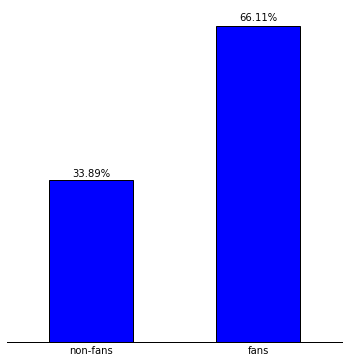

In [28]:
# Percentage of fans vs. non-fans
resp = swo.groupby('is_fan').agg({'is_fan': 'count'}) 
resp = resp / resp.sum()

# Define a function which will create bar chart in the defined style
def swo_bar(data, x_ticklabels, title = '', rot=0, leg=False, norm=True):
    chart = data.plot(kind='bar', legend=leg, figsize=(6, 6))
    chart.set_xticklabels(x_ticklabels, rotation=rot)
    chart.axes.get_yaxis().set_visible(False)
    chart.set_xlabel(title)
    chart.tick_params(bottom='off',
                   top='off',
                   left='off',
                   right='off')
    sides = ['left', 'right', 'top']
    for side in sides:
        chart.spines[side].set_visible(False)
    
    for p in chart.patches:
        if norm:
            chart.annotate(str(np.round(p.get_height() * 100,
                                        decimals=2)) + '%',
                           (p.get_x() + p.get_width()/2,
                            p.get_height() * 1.015),
                           horizontalalignment='center')
        else:
            chart.annotate(str(np.round(p.get_height(),
                                        decimals=2)),
                           (p.get_x() + p.get_width()/2,
                            p.get_height() + .05),
                           horizontalalignment='center')   
    plt.show()
    
# Creating a bar chart
swo_bar(resp, ['non-fans', 'fans'])

The number of fans in the dataset is two times bigger than the number of non-fans. If the analysis would be conducted without separation the results tend to be biased. That's why the data will be analyzed separately. We will now explore age distributions. As the data separated on categories I will use a bar chart for the visualization.  

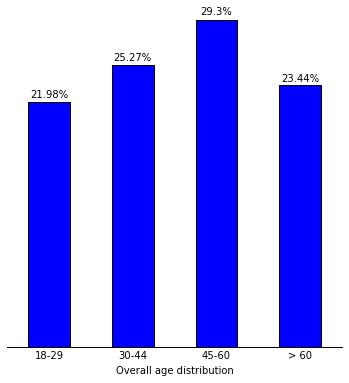

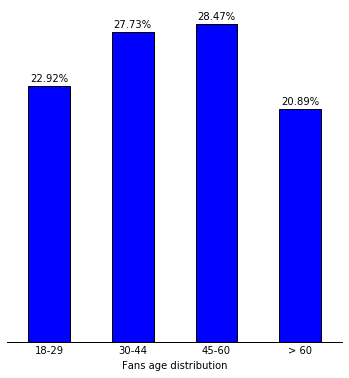

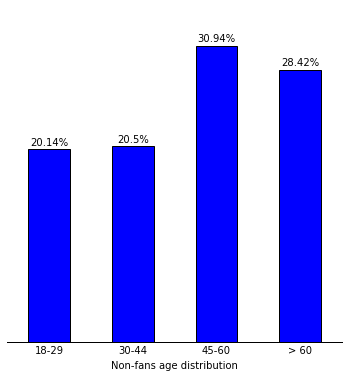

In [29]:
# Create separate datasets for each group
swo_fans = swo[swo['is_fan'] == 1]
swo_non_fans = swo[swo['is_fan'] == 0]
data_sets = [('Overall', swo), ('Fans', swo_fans),
             ('Non-fans', swo_non_fans)]

# Explore age distribution
for key, data in data_sets:
    data_set = data.groupby('age').agg({'age':'count'})
    swo_bar(data_set / data_set.sum(), x_ticklabels=data_set.index,
        title=key + ' age distribution')

The overall age distribution is very close to fans distribution. The distribution of non-fans has a bit older people. There is no significant difference between age groups for all respondents, fans, and non-fans. We will now explore the distribution of income.

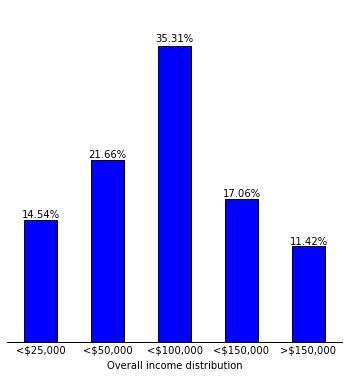

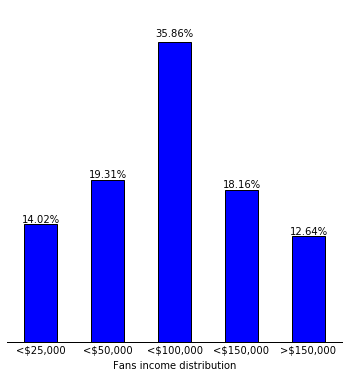

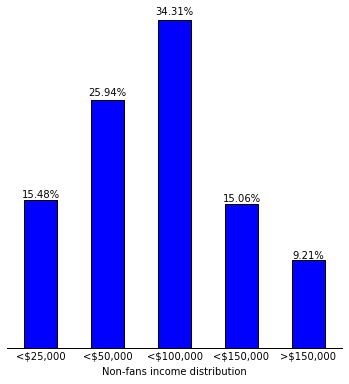

In [30]:
for key, data in data_sets:
    data_set = data.groupby('household_income').agg(
        {'household_income':'count'})
    data_set = data_set.reindex(index=['<$25,000',
                                       '<$50,000',
                                       '<$100,000',
                                       '<$150,000',
                                       '>$150,000'])
    swo_bar(data_set / data_set.sum(),
            x_ticklabels=data_set.index,
            title=key + ' income distribution')

There is no difference in income between fans and non-fans.

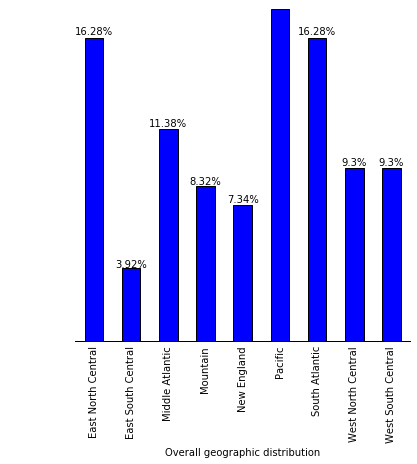

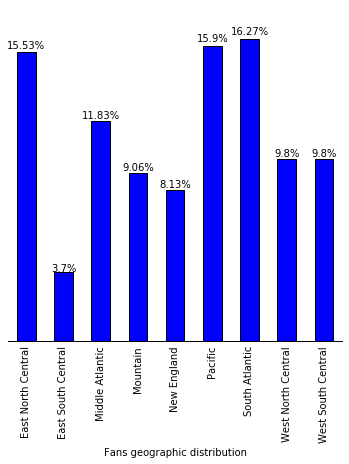

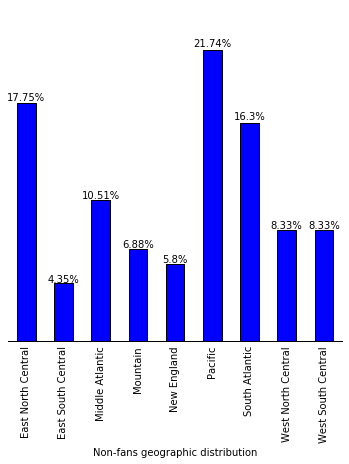

In [31]:
# Explore geographic distribution
for key, data in data_sets[:]:
    data_set = data.groupby('location').agg({'location': 'count'})
    swo_bar(data_set / data_set.sum(), x_ticklabels = data_set.index,
           title=key + ' geographic distribution', rot=90)

The only significant difference is that the majority of non-fans live in Pacific area.

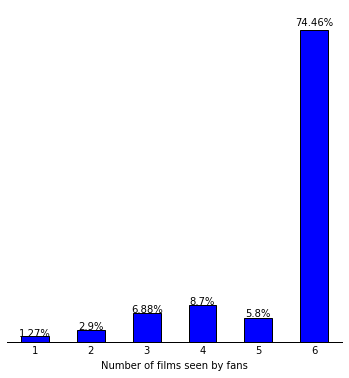

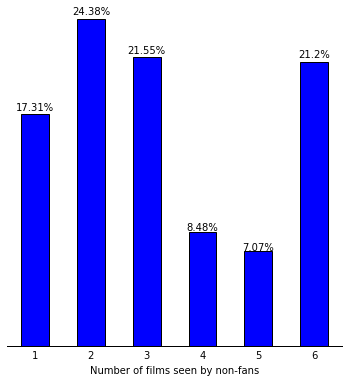

In [32]:
# Explore the number of films seen by fans and non-fans
for key, data in data_sets[1:]:
    data_set = data.groupby('num_film_seen').agg(
        {'num_film_seen': 'count'})
    swo_bar(data_set / data_set.sum(), x_ticklabels=range(1, 7),
           title='Number of films seen by ' + key.lower())

It is not surprising that the majority of fans has seen all films from the series and only 21% of non-fans have done it. Let's look what is the most and the less popular film within each group.

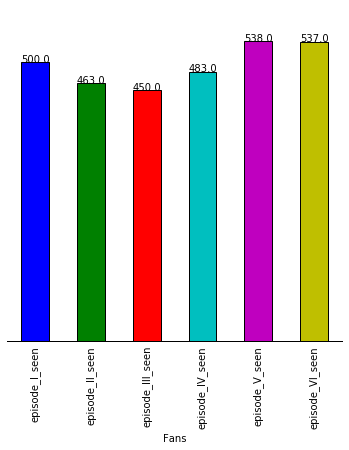

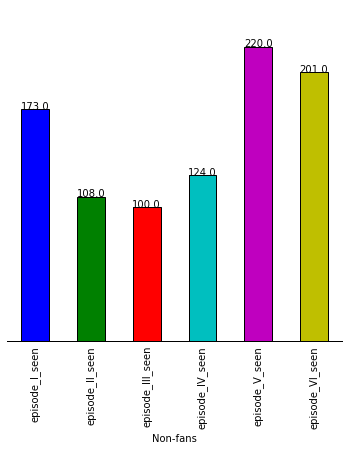

In [33]:
# Explore the number of each episode seen
for key, data in data_sets[1:]:
    data_set = (data.loc[:,'episode_I_seen':'episode_VI_seen']
                .fillna(0).sum())
    swo_bar(data_set, data_set.index, rot=90, title=key, norm=False)

Overall, the most seen episode is the fifth episode "The Empire Strikes Back". This is common for fans and non-fans. However, among fans, the sixth episode is as popular as the fifth one. Let's take a look at the most and the least favorable film within each group.

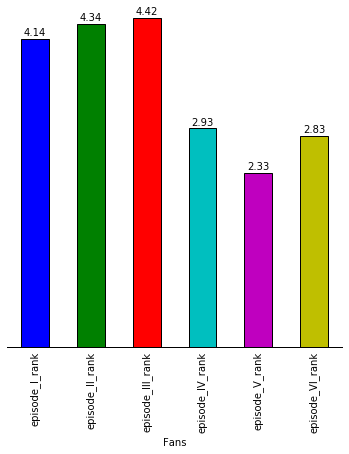

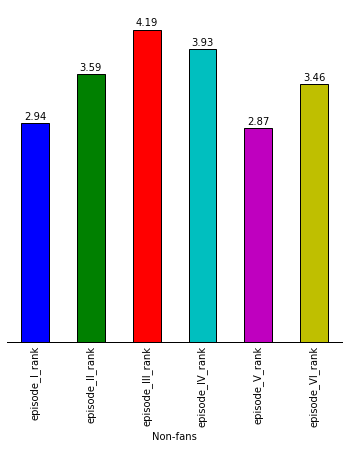

In [34]:
for key, data in data_sets[1:]:
    data_set = (data.loc[:,'episode_I_rank':'episode_VI_rank'].mean())
    swo_bar(data_set, data_set.index, rot=90, title=key, norm=False)

Let me remind you that the films were ranked from 1 to 6 where 1 is the highest rank and 6 is the lowest. It seems like that the more people have seen the film the bigger rank it has which is not surprising, of course.  Let's create scatter plots to look at the relationship. 

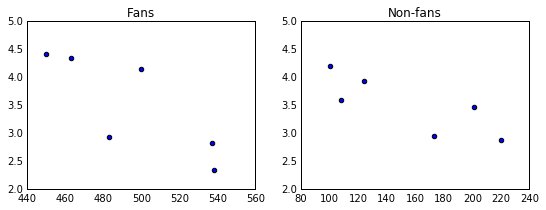

In [35]:
# Create a scatter plot based on a number of times the episode seen and
# it's ranking
fig = plt.figure(figsize=(9, 3))
for i in range(1, 3):
    x = (data_sets[i][1].loc[:,'episode_I_seen':'episode_VI_seen']
                .fillna(0).sum())
    y = (data_sets[i][1].loc[:,'episode_I_rank':'episode_VI_rank'].mean())
    ax = fig.add_subplot(1, 2, i)
    ax.scatter(x, y)
    ax.tick_params(bottom='off',
                   top='off',
                   left='off',
                   right='off')
    ax.set_ylim(2, 5)
    plt.title(data_sets[i][0])
plt.show()

We can assume that there is a negative linear relationship between the number of people who have seen the episode and it's rank. The relationship is negative as the ranking is ascending. We will now explore who is the most and the least favorable character among fans and non-fans. The ranking is ascending here again where 1 is the highest and 5 is the lowest.

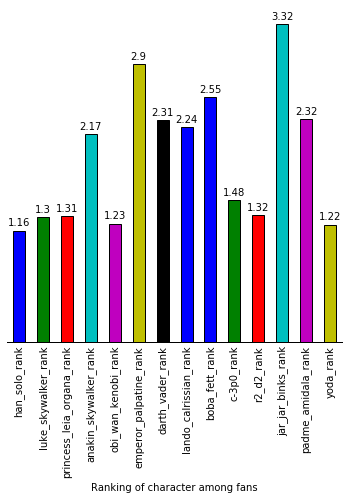

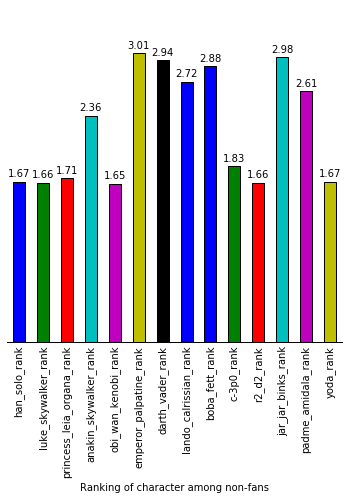

In [36]:
# Explore the most and the least favorable character among fans and
# non-fans
for key, data in data_sets[1:]:
    data_set = data.loc[:,'han_solo_rank':'yoda_rank'].mean()
    swo_bar(data_set, data_set.index, rot=90,
            title='Ranking of character among ' + key.lower(), norm=False)

First of all, if I were you I would not rely on non-fans ranking because not all characters appear in every episode so non-fans might not be familiar with a character and still rank him or her. Even though, we can see that the ranking a very close for both groups. 
Top 5 favorable characters among fans:
- Han Solo;
- Yoda;
- Obi-Wan Kenobi;
- Luke Skywalker;
- Leia Organa;
Top 5 favorable characters among non-fans:
- Obi-Wan Kenobi;
- R2 D2;
- Luke Skywalker;
- Han Solo;
- Yoda;

Top 5 unfavorable characters among fans:
- Jar Jar Binks;
- Emperor Palpatine;
- Boba Fett;
- Padme Amidala;
- Darth Vader;
Top 5 unfavorable characters among non-fans:
- Emperor Palpatine;
- Jar Jar Binks;
- Darth Vader;
- Boba Fett;
- Lando Calrissian;

Top 5 unfavorable characters among fans are a bit surprising. Personally, I did not expect that Jar Jar Binks is the most unfavorable character. Of course, to see Padme in this list is also very surprising. When it comes to non-fans the ranking is more or less expected. The last part of our analysis is 'who shot first?'. 

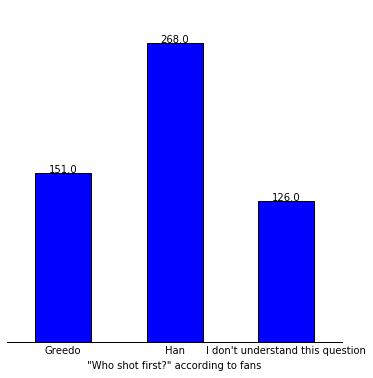

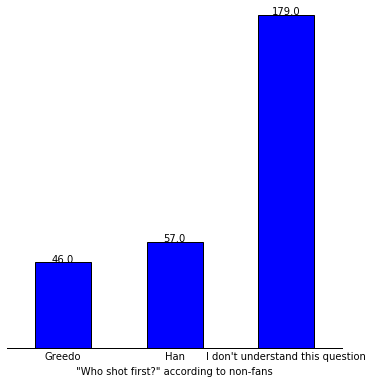

In [37]:
for key, data in data_sets[1:]:
    data_set = data.groupby('who_shot_first').agg(
        {'who_shot_first': 'count'})
    swo_bar(data_set, data_set.index, 
           title = '"Who shot first?" according to ' + key.lower(),
           norm=False)

This is not surprising that the majority of non-fans didn't understand the question. I assume that's why the remaining answers are very close. The majority of fans think that the Han shot first. 